In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB  
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import mutual_info_classif


In [2]:
#importing data
df = pd.read_csv("thyroid.csv")


In [3]:
#removing null values

thyroid_df = df.copy()
thyroid_df.replace('?',np.nan,inplace=True)
thyroid_df.astype(float)
thyroid_df


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,It3t treatment,query hypothyroid,...,t3,tt4 measured,tt4,t4U measured,t4U,ftI measured,ftI,tBG measured,referral source,binaryClass
0,41,0,0,0,0,0,0,0,0,0,...,2.5,1,125,1,1.14,1,109,0,0,0
1,23,0,0,0,0,0,0,0,0,0,...,2,1,102,0,NaN,0,NaN,0,4,0
2,46,1,0,0,0,0,0,0,0,0,...,NaN,1,109,1,0.91,1,120,0,4,0
3,70,0,1,0,0,0,0,0,0,0,...,1.9,1,175,0,NaN,0,NaN,0,4,0
4,70,0,0,0,0,0,0,0,0,0,...,1.2,1,61,1,0.87,1,70,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,0,NaN,0,NaN,0,4,0
3768,68,0,0,0,0,0,0,0,0,0,...,2.1,1,124,1,1.08,1,114,0,1,0
3769,74,0,0,0,0,0,0,0,0,0,...,1.8,1,112,1,1.07,1,105,0,4,0
3770,72,1,0,0,0,0,0,0,0,0,...,2,1,82,1,0.94,1,87,0,1,0


In [4]:
thyroid_df.astype(float)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,It3t treatment,query hypothyroid,...,t3,tt4 measured,tt4,t4U measured,t4U,ftI measured,ftI,tBG measured,referral source,binaryClass
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,1.0,125.0,1.0,1.14,1.0,109.0,0.0,0.0,0.0
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,102.0,0.0,NaN,0.0,NaN,0.0,4.0,0.0
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1.0,109.0,1.0,0.91,1.0,120.0,0.0,4.0,0.0
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.9,1.0,175.0,0.0,NaN,0.0,NaN,0.0,4.0,0.0
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.2,1.0,61.0,1.0,0.87,1.0,70.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,4.0,0.0
3768,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.1,1.0,124.0,1.0,1.08,1.0,114.0,0.0,1.0,0.0
3769,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.8,1.0,112.0,1.0,1.07,1.0,105.0,0.0,4.0,0.0
3770,72.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,82.0,1.0,0.94,1.0,87.0,0.0,1.0,0.0


In [5]:

cols = ['tSH','t3','tt4','t4U','ftI']

for i in cols :
    thyroid_df[i] = thyroid_df[i].fillna(thyroid_df[i].median()).astype(float)

thyroid_df['sex'].fillna(int(thyroid_df['sex'].median()), inplace=True)
thyroid_df['age'].fillna(int(thyroid_df['age'].median()), inplace=True)


thyroid_df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,It3t treatment,query hypothyroid,...,t3,tt4 measured,tt4,t4U measured,t4U,ftI measured,ftI,tBG measured,referral source,binaryClass
0,41,0,0,0,0,0,0,0,0,0,...,2.5,1,125.0,1,1.14,1,109.0,0,0,0
1,23,0,0,0,0,0,0,0,0,0,...,2.0,1,102.0,0,0.98,0,107.0,0,4,0
2,46,1,0,0,0,0,0,0,0,0,...,2.0,1,109.0,1,0.91,1,120.0,0,4,0
3,70,0,1,0,0,0,0,0,0,0,...,1.9,1,175.0,0,0.98,0,107.0,0,4,0
4,70,0,0,0,0,0,0,0,0,0,...,1.2,1,61.0,1,0.87,1,70.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0,0,0,0,0,0,0,0,0,...,2.0,0,103.0,0,0.98,0,107.0,0,4,0
3768,68,0,0,0,0,0,0,0,0,0,...,2.1,1,124.0,1,1.08,1,114.0,0,1,0
3769,74,0,0,0,0,0,0,0,0,0,...,1.8,1,112.0,1,1.07,1,105.0,0,4,0
3770,72,1,0,0,0,0,0,0,0,0,...,2.0,1,82.0,1,0.94,1,87.0,0,1,0


In [6]:
#featured_data = thyroid_df[['tSH','tt4','ftI','t3','tSH measured','age','query hyperthyroid','tt4 measured','t4U measured']]

x = thyroid_df.drop(columns=['binaryClass'], axis=1)
y = thyroid_df['binaryClass']

x= x .astype('int')
y= y.astype('int')


In [7]:
#from sklearn.feature_selection import RFE
#from sklearn.ensemble import GradientBoostingClassifier

#sel=RFE(GradientBoostingClassifier(n_estimators=100,random_state=0),n_features_to_select=9)

#sel.fit(x,y)

#f= x.columns[sel.get_support()]
#print(f)

In [8]:
#x_train_gb=sel.transform(x_train)
#x_test_gb=sel.transform(x_test)

In [9]:
#def run_randomForest (x_train, x_test, y_train, y_test):
#   clf =RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
#   clf.fit(x_train, y_train)
#   y_pred =clf.predict(x_test)
#   print('Accuracy: ', accuracy_score (y_test, y_pred))
#run_randomForest(x_train_gb,x_test_gb,y_train, y_test)

In [10]:
#x=thyroid_df[['age', 'on thyroxine', 'thyroid surgery', 'query hypothyroid', 'tSH',
#       't3', 'tt4', 'ftI', 'referral source']]
#x.tail(n=10)
#print(x.shape)
#y.shape

In [11]:
#x_train,x_test,y_train,y_test=train_test_split(x,thyroid_df['binaryClass'],test_size=0.3,random_state=0)
#x_train.shape,x_test.shape

In [12]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2

#chi2_features = SelectKBest(chi2, k = 10)


#x_kbest = chi2_features.fit(x, y)

#chi = x_kbest.transform(x)

#chi_2_features = x.columns[x_kbest.get_support()]

# Reduced features
#print('Original feature number:', x.shape)
#print('Reduced feature number:', chi_2_features)

#print(chi[:10,0:])

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

annova_features = SelectKBest(f_classif, k = 10)

annova_best = annova_features.fit(x, y)

annova = annova_best.transform(x)

f_x = x.columns[annova_best.get_support()]

# Reduced features

print('Original feature number:', x.shape)
print('Reduced feature number:', f_x)

annova[-10:,0:]

Original feature number: (3772, 28)
Reduced feature number: Index(['sex', 'on thyroxine', 'query hypothyroid', 'tSH measured', 'tSH', 't3',
       'tt4 measured', 'tt4', 't4U', 'ftI'],
      dtype='object')


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [26] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([[  1,   0,   0,   0,   1,   1,   1,  72,   0, 103],
       [  0,   0,   0,   0,   1,   2,   0, 103,   0, 107],
       [  1,   0,   0,   1,   1,   1,   1,  89,   0, 104],
       [  0,   1,   0,   1,   8,   2,   1, 104,   1,  92],
       [  0,   0,   0,   1,   8,   2,   1, 108,   1,  97],
       [  0,   0,   0,   0,   1,   2,   0, 103,   0, 107],
       [  0,   0,   0,   1,   1,   2,   1, 124,   1, 114],
       [  0,   0,   0,   1,   5,   1,   1, 112,   1, 105],
       [  1,   0,   0,   1,   0,   2,   1,  82,   0,  87],
       [  0,   0,   0,   1,   1,   2,   1,  99,   1,  92]])

In [14]:
x_train, x_test, y_train, y_test = train_test_split( annova ,y,test_size=0.3,random_state=0)

In [15]:

#ML Models

model1 = LogisticRegression(max_iter = 15000)
model2 = RandomForestClassifier(n_estimators = 10)
model3=  KNeighborsClassifier(n_neighbors=3)
model4 = svm.SVC(kernel='linear')
model5 = GaussianNB()


model1 = model1.fit(x_train, y_train)
model2 = model2.fit(x_train, y_train)
model3 = model3.fit(x_train, y_train)
model4 = model4.fit(x_train, y_train)
model5 = model5.fit(x_train, y_train)



In [16]:
model1_pred = model1.predict(x_test)  #LR
model1_acc = accuracy_score(y_test, model1_pred) *100
print("Accuracy of Logistic regression:",model1_acc)
 
model2_pred = model2.predict(x_test)  #RF
model2_acc = accuracy_score(y_test, model2_pred)*100
print("Accuracy of Random Forest:",model2_acc)

model3_pred = model3.predict(x_test) #KNN
model3_acc = accuracy_score(y_test, model3_pred)*100
print("Accuracy of KNN:",model3_acc)

model4_pred = model4.predict(x_test) #SVM
model4_acc = accuracy_score(y_test, model4_pred)*100
print("Accuracy of SVM:",model4_acc)

model5_pred = model5.predict(x_test)  #NB
model5_acc = accuracy_score(y_test, model5_pred)*100
print("Accuracy of navie bayes:",model5_acc)

Accuracy of Logistic regression: 94.87632508833921
Accuracy of Random Forest: 99.1166077738516
Accuracy of KNN: 95.93639575971731
Accuracy of SVM: 95.49469964664311
Accuracy of navie bayes: 55.03533568904594


In [17]:


final_model = VotingClassifier(estimators=[ ('lr', model1), ('rf', model2),('knn', model3),('svn', model4),('nb', model5)], voting='hard' )

final_model.fit(x_train,y_train)

#x_test =[[ 0,   0,   0,   1,   8,   2,   1, 108,   1,  97]]

#prediction = final_model.predict(x_test)

#if (prediction[0] == 0):
#  print('Tyroid')
#else:
#  print('no tyroid')

y_pred = final_model.predict(x_test)

vot_acc  = accuracy_score(y_test, y_pred)*100

print("Accuracy of Voting classifier: ",vot_acc)





Accuracy of Voting classifier:  96.64310954063605


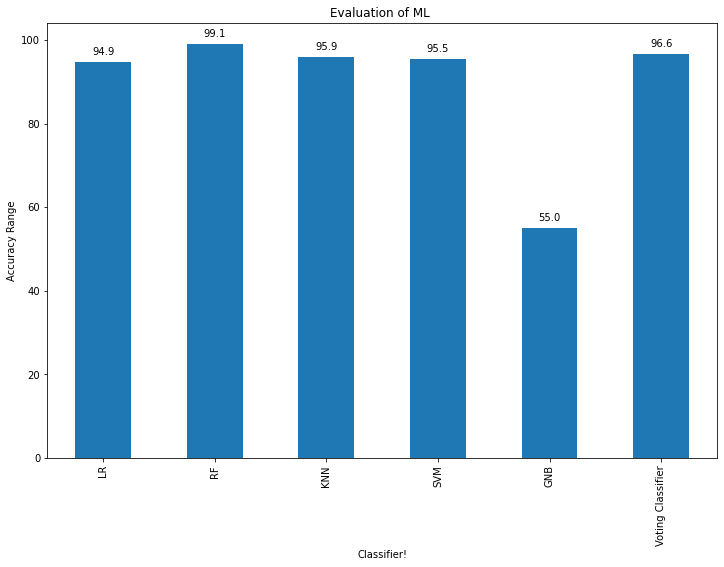

In [18]:
#Graph plotting

import matplotlib.pyplot as plt

frequencies = [model1_acc,model2_acc,model3_acc,model4_acc,model5_acc,vot_acc]

freq_series = pd.Series(frequencies)

x_labels = ['LR','RF','KNN','SVM','GNB','Voting Classifier']

plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML ')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'

       
        if y_value < 0:
            space *= -1
            va = 'top'
            
        label = "{:.1f}".format(y_value)

       
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      
                                        
add_value_labels(ax)
plt.show()

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
predictions= final_model.predict(x_test)
percentage=final_model.score(x_test,y_test)
res=confusion_matrix(y_test,predictions)
print("validation confusion matrix of Ensemble model")
print(res)
print(classification_report(y_test, predictions))

validation confusion matrix of Ensemble model
[[1024    4]
 [  34   70]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1028
           1       0.95      0.67      0.79       104

    accuracy                           0.97      1132
   macro avg       0.96      0.83      0.88      1132
weighted avg       0.97      0.97      0.96      1132



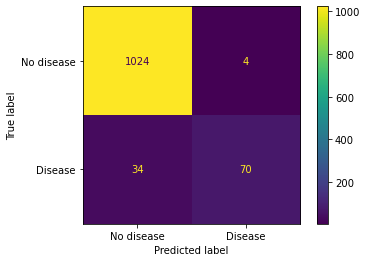

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred,labels=[0,1])

cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No disease','Disease'])
cm_disp.plot()

In [21]:
tp,fn,fp,tn=confusion_matrix(y_test,y_pred,labels=[1,0]).ravel()
percision=tp/(tp+fp)
percision

0.9459459459459459

In [22]:
from joblib import dump

dump(final_model,'thyroid_model')

['thyroid_model']